# UNAD
## EDGAR ARLEY PALACIOS RODRIGUEZ
## AGRUPAMIENTO EN K-MEANS

## 1.Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.


In [ ]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones


# librerías de para implementar modelo Kmeans
from sklearn.cluster import KMeans  #algoritmos de agrupamiento o clustering, dividir datos en grupos o clusters basados en su similitud.
from sklearn.preprocessing import LabelEncoder #escalar o normalizar los datos 
from scipy.cluster.hierarchy import linkage, dendrogram #herramientas para realizar agrupamiento jerárquico y visualización de dendrogramas.
#dendrogram:  genera un gráfico de árbol 

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from datetime import datetime

#Librería para evitar la advertencia de que el modelo tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

In [71]:
Datos = pd.read_csv('./Mall_Customers.csv')

In [73]:
Datos.head(40)

,CustomerID,genero,edad,ingresos_anuales,puntuacion_gasto
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


Datos.describe()

In [77]:
Datos.describe()

,CustomerID,edad,ingresos_anuales,puntuacion_gasto
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atipicos')

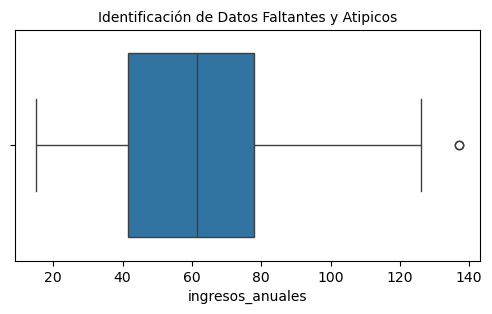

In [79]:

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['ingresos_anuales'])
plt.title('Identificación de Datos Faltantes y Atipicos', fontsize=10)

## 2.Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario


In [81]:
#Revisión de datos faltantes
print("Cantidad de Registros con cero en Edad:", Datos['edad'].isin([0]).sum())
print("Cantidad de Registros con cero en Ingresos Anuales: ", Datos['ingresos_anuales'].isin([0]).sum())
print("Cantidad de Registros con cero en Puntuacion de Gasto: ", Datos['puntuacion_gasto'].isin([0]).sum())

Cantidad de Registros con cero en Edad: 0
Cantidad de Registros con cero en Ingresos Anuales:  0
Cantidad de Registros con cero en Puntuacion de Gasto:  0


In [83]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        200 non-null    int64 
 1   genero            200 non-null    object
 2   edad              200 non-null    int64 
 3   ingresos_anuales  200 non-null    int64 
 4   puntuacion_gasto  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [85]:
Datos = Datos[["edad", "ingresos_anuales", "puntuacion_gasto"]]

In [87]:
Datos.head(10)

,edad,ingresos_anuales,puntuacion_gasto
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


In [ ]:
plt.scatter(Datos['ingresos_anuales'], Datos['puntuacion_gasto'])
plt.xlabel('Ingresos Anuales')
plt.ylabel('Data Credito')
plt.title('Grupo de Clientes')
plt.show()

## 4. Entrenar el modelo configurando los diferentes hiperparámetros

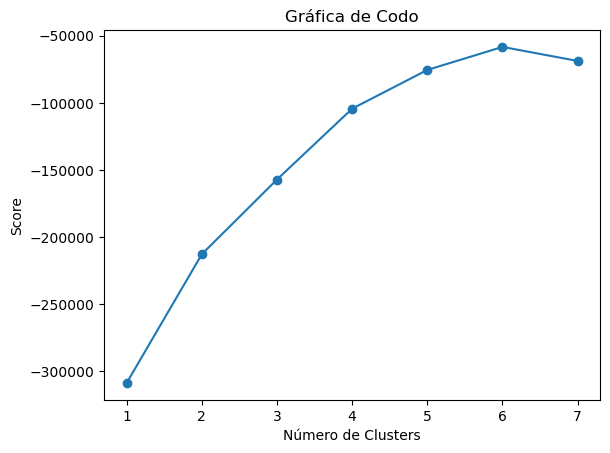

In [91]:
Nc = range(1, 8)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Datos).score(Datos) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()

In [102]:
Modelo = KMeans(n_clusters=7, random_state=0)
Modelo.fit(Datos)

KMeans(n_clusters=7, random_state=0)

In [99]:
Modelo.labels_
Datos["Grupo"] = Modelo.labels_
print (Datos)

     edad  ingresos_anuales  puntuacion_gasto  Grupo
0      19                15                39      5
1      21                15                81      6
2      20                16                 6      5
3      23                16                77      6
4      31                17                40      5
..    ...               ...               ...    ...
195    35               120                79      1
196    45               126                28      3
197    32               126                74      1
198    32               137                18      3
199    30               137                83      1

[200 rows x 4 columns]


## 5.Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc

In [106]:
Observaciones = len(Datos)
X = Datos.drop('Grupo', axis=1)
clusters = Datos['Grupo']

sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

table_date = [
    ["Num. Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

from tabulate import tabulate
print(tabulate(table_date, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
|    Num. Observaciones    |         200         |
|  Coeficiente Silhouette  | 0.43509714214250295 |
| Indice Calinski Harabasz | 160.61256994986596  |
|  Indice Davies Bouldin   |  0.829793312548708  |
+--------------------------+---------------------+


## 6.Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

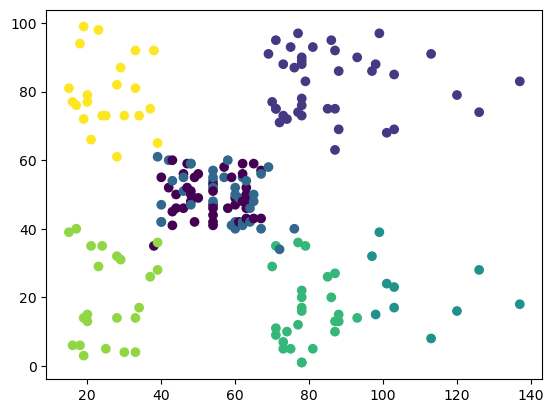

In [108]:
plt.scatter(Datos['ingresos_anuales'], Datos['puntuacion_gasto'], c=Datos['Grupo'], cmap='viridis')

## 7. Interpretar, analizar y documentar los resultados obtenidos

- En la gráfica de codo podemos observar que el punto donde la pendiente cambia drásticamente parece estar en 5 o 6 clusters, donde indica que este número de clusters podría ser el más idóneo

- Coeficiente de Silhouette: con la puntuación de  0,435 se infiere que algunos clusters están bien definidos, pero otros tiene límites difusos, también puede indicar que existe una redundancia en las variables o dimensiones. 

- Índice de Calinski-Harabasz: con la puntuación de 160.1 se infiere que existe una separación moderada entre clusters, existe una cierta compactación dentro de los clusters. La distancia entre clusters es aceptable, pero podría ser mayor.
    
- Indice Davies Bouldin: Un valor de 0.8298 indica que, los clusters son razonablemente compactos, pero hay margen para mejorar la separación entre ellos.
Algunos clusters podrían estar demasiado cerca o no tener forma compacta.
